# Understanding the dataset

Import Libraries

In [4]:
%pip install numpy
%pip install pandas
%pip install tensorflow
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.ensemble import GradientBoostingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Smote
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline

from sklearn.metrics import precision_recall_curve, auc
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV

In [46]:
df = pd.read_csv('creditcard.csv')

# Change the columm Class to Fraud
df.rename(columns={'Class': 'Fraud'}, inplace=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [48]:
# Check for Null Values
df.isnull().sum().max()

0

In [49]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Fraud'],
      dtype='object')

In [50]:
# Check class distribution
print("\nClass Distribution:\n", df['Fraud'].value_counts())

# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Class Distribution:
 Fraud
0    284315
1       492
Name: count, dtype: int64
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Visualization of Dataset

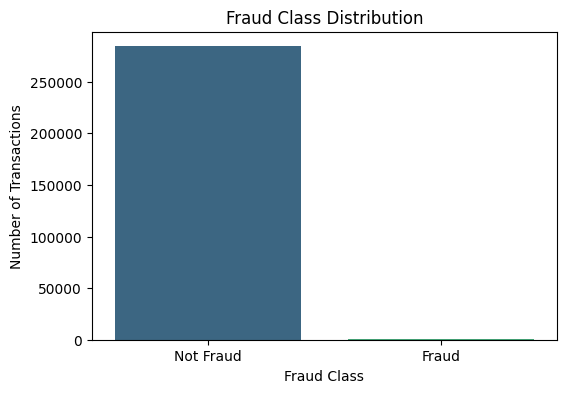

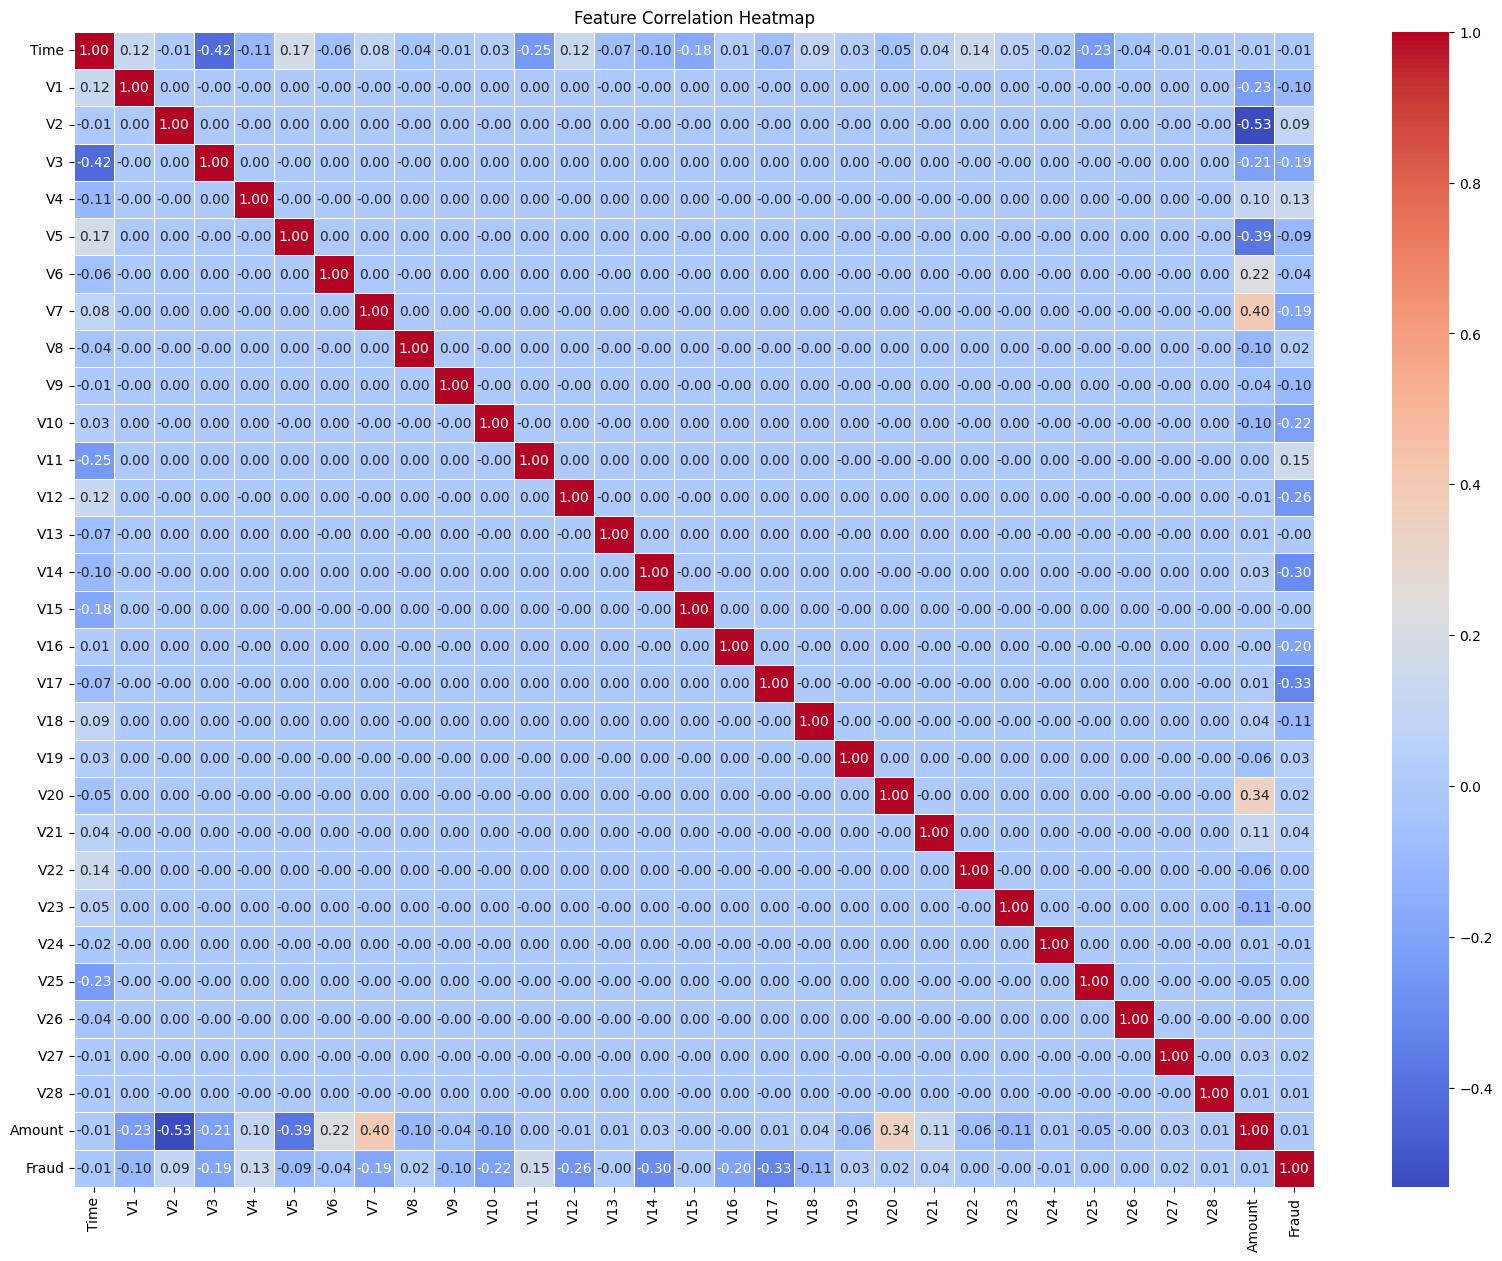

In [51]:
# Fraud Class Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Fraud"].value_counts().index,
            y=df["Fraud"].value_counts().values,
            hue=df["Fraud"].value_counts().index,
            palette="viridis",
            legend=False)

plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.xlabel("Fraud Class")
plt.title("Fraud Class Distribution")
plt.show()

# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Feature Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Outlier Removal

In [52]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = df['V14'].loc[df['Fraud'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = df['V12'].loc[df['Fraud'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 44)


# Removing outliers V10 Feature
V4_fraud = df['V4'].loc[df['Fraud'] == 1].values
q25, q75 = np.percentile(V4_fraud, 25), np.percentile(V4_fraud, 75)
V4_iqr = q75 - q25

V4_cut_off = V4_iqr * 1.5
V4_lower, V4_upper = q25 - V4_cut_off, q75 + V4_cut_off
print('V4 Lower: {}'.format(V4_lower))
print('V4 Upper: {}'.format(V4_upper))
outliers = [x for x in V4_fraud if x < V4_lower or x > V4_upper]
print('V4 outliers: {}'.format(outliers))
print('Feature V4 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V4'] > V4_upper) | (df['V4'] < V4_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 284506
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V4 Lower: -3.5689329354685535
V4 Upper: 12.171805988464309
V4 outliers: []
Feature V4 Outliers for 

# Data Preprocessing

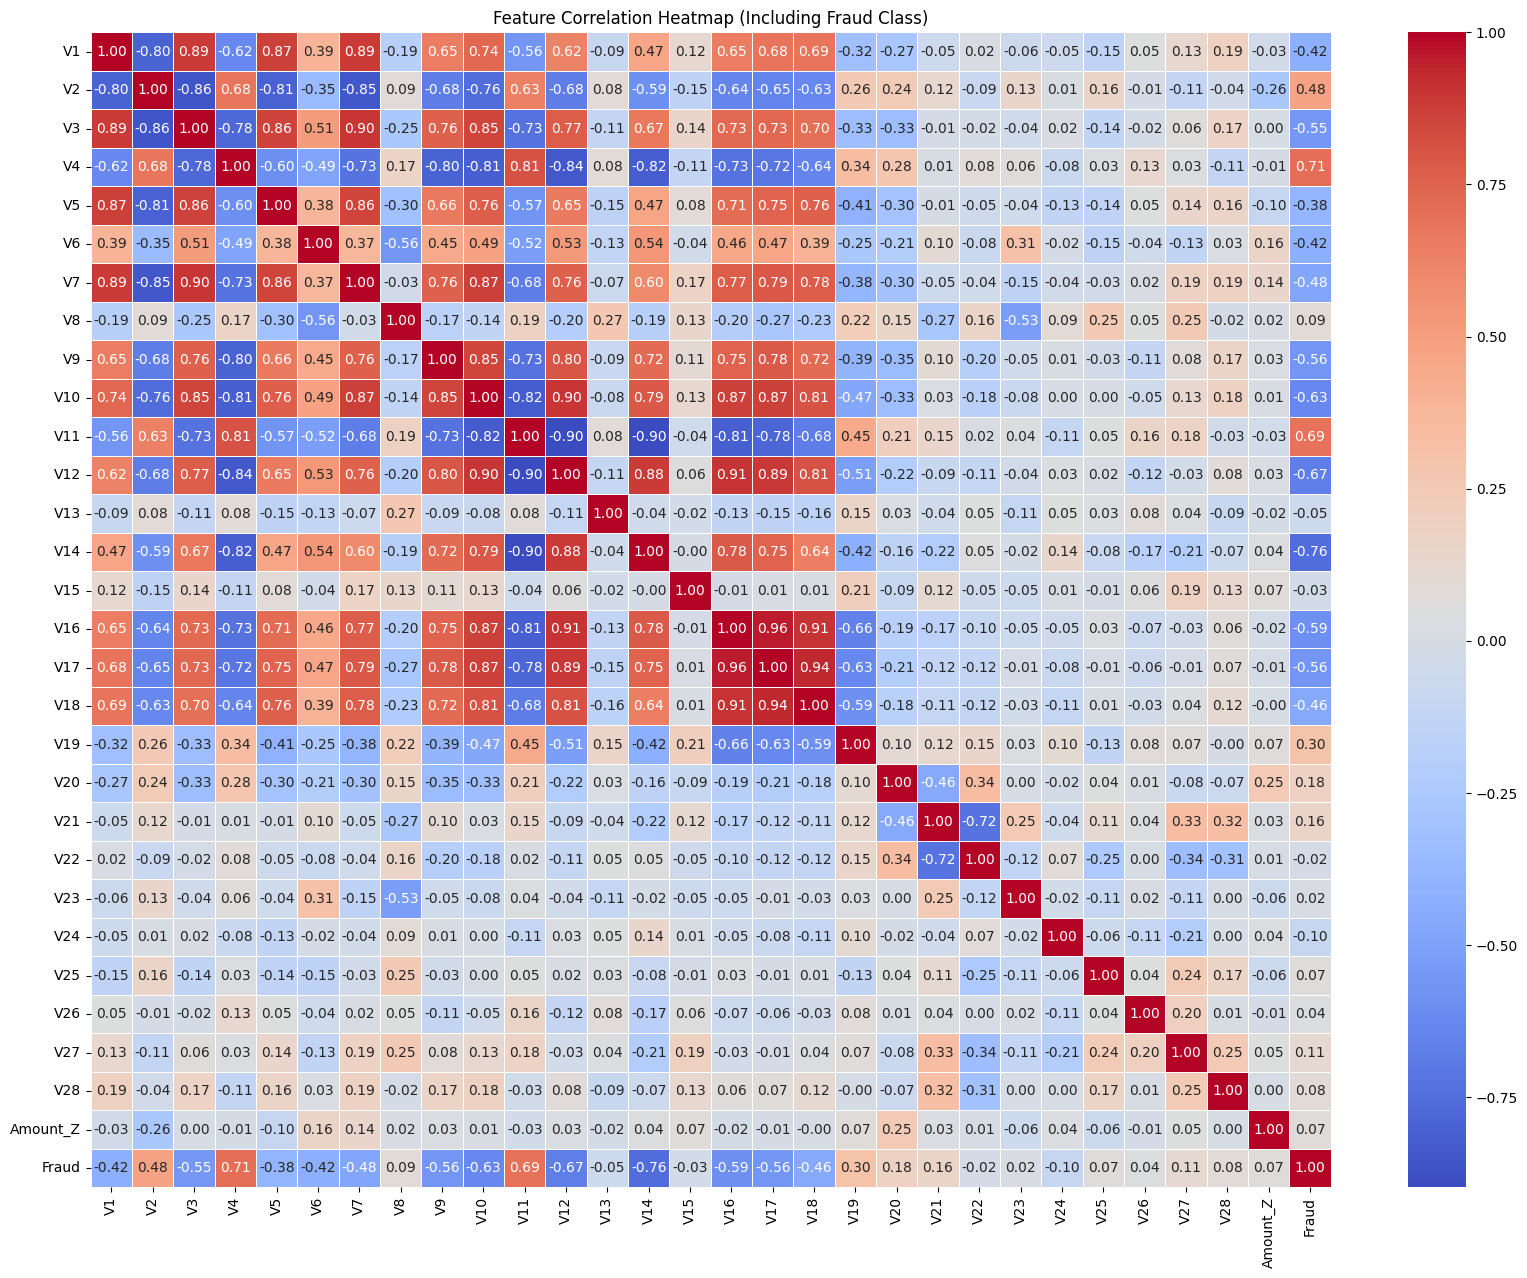

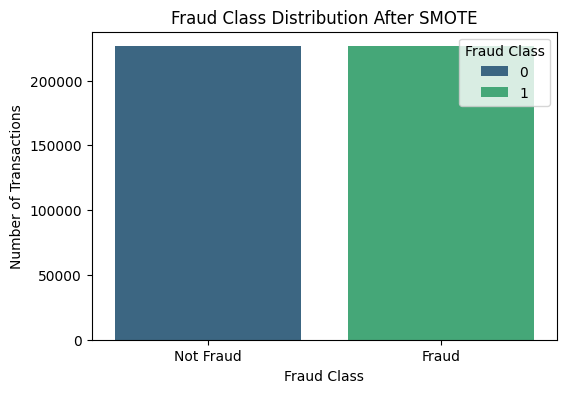

In [53]:
# Feature Engineering - Alternative Features
# 1. Standardize Transaction Amount
scaler = StandardScaler()         # Swap scaler to emphasize higher amounts
df["Amount_Z"] = scaler.fit_transform(df[["Amount"]])


df.drop(columns=["Amount", "Time"], inplace=True)

# Separate features and target variable
df = df.dropna(subset=['Fraud'])  # Remove rows where 'Fraud' is NaN
X = df.drop(columns=['Fraud'])
y = df['Fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set only
# smote = SMOTETomek(sampling_strategy="minority", random_state=42)  # Adjust strategy if needed
smote = SMOTE(sampling_strategy="minority", random_state=42)  # Adjust strategy if needed
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Convert to DataFrame for feature selection
X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
y_train_sm = pd.Series(y_train_sm)

# Normalize features
X_train_sm = pd.DataFrame(scaler.fit_transform(X_train_sm), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Add Fraud column back for correlation analysis
X_train_sm['Fraud'] = y_train_sm

# Compute correlation matrix including Fraud
correlation_matrix = X_train_sm.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Fraud Class)")
plt.show()

# Drop Fraud column again for model training
X_train_sm = X_train_sm.drop(columns=['Fraud'])

# Fraud Class Distribution After SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y_train_sm.value_counts().index,
            y=y_train_sm.value_counts().values,
            hue=y_train_sm.value_counts().index,
            palette="viridis")

plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.xlabel("Fraud Class")
plt.title("Fraud Class Distribution After SMOTE")
plt.legend(title="Fraud Class")
plt.show()

# Anomaly Distros Plot Visualisation

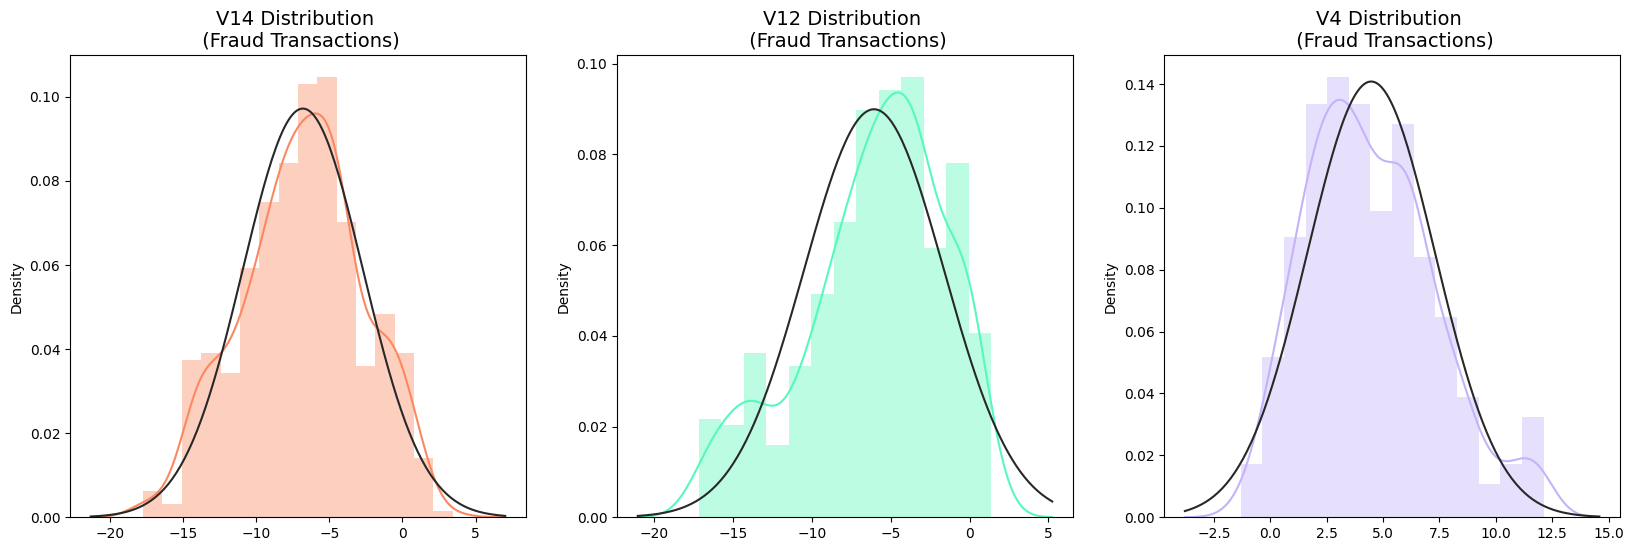

In [54]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Fraud'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Fraud'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V4'].loc[df['Fraud'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

# Cross Validation

In [56]:
%pip install xgboost
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
import xgboost as xgb

# Define a pipeline that applies preprocessing and SMOTE
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Normalize features
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE only to training folds
    ('classifier', xgb.XGBClassifier(n_estimators=50, random_state=42, class_weight="balanced"))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Cross-validation

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')  # Evaluate the model

print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 3.4/124.9 MB 18.3 MB/s eta 0:00:07
   - -------------------------------------- 4.7/124.9 MB 11.9 MB/s eta 0:00:11
   - -------------------------------------- 6.0/124.9 MB 9.7 MB/s eta 0:00:13
   -- ------------------------------------- 7.6/124.9 MB 9.0 MB/s eta 0:00:13
   --- ------------------------------------ 9.7/124.9 MB 9.3 MB/s eta 0:00:13
   --- ------------------------------------ 11.5/124.9 MB 9.2 MB/s eta 0:00:13
   ---- ----------------------------------- 13.6/124.9 MB 9.4 MB/s eta 0:00:12
   ---- ----------------------------------- 15.2/124.9 MB 9.2 MB/s eta 0:00:12
   ----- ---------------------------------- 16.3/124.9 MB 8.8 MB/s eta 0:00:13
   ----- ---------------------------------- 17.3/124.9 MB 8.5 MB/s eta 0:00:13
   ------ --------------------------------- 18.9/124.9 MB 8.3 MB/s eta 0:00:13
   ------ --------------------------------- 20.4/124.9 MB 8.3 M

# Hyperparameter Tuning

# Models

In [58]:
# XGB 

%pip install xgboost

import xgboost as xgb

start_time = time.time()

# Define the pipeline with SMOTE and XGBoost Classifier
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy="minority", random_state=42)),  
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define parameter grid for XGBoost hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 300, 500],  # XGBoost typically needs more trees
    'classifier__learning_rate': [0.01, 0.1, 0.2],  
    'classifier__max_depth': [3, 5, 7],  
    'classifier__subsample': [0.7, 0.8, 0.9],  
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],  # Column sampling for better generalization
    'classifier__min_child_weight': [1, 3, 5],  # Min weight of child nodes to reduce overfitting
    'classifier__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required for further split
}

# Stratified K-Fold ensures class balance
strat_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# HalvingGridSearchCV for hyperparameter tuning
search_start_time = time.time()
halving_search = HalvingGridSearchCV(
    pipeline, param_grid, cv=strat_kfold, scoring='f1',
    factor=3, n_jobs=-1, verbose=1, random_state=42
)

# Fit the model using HalvingGridSearchCV
halving_search.fit(X_train_sm, y_train_sm)
search_end_time = time.time()

# Get best hyperparameters
best_params = halving_search.best_params_

# Increase `n_estimators` for final training
best_params['n_estimators'] = 300

# Remove 'classifier__' prefix from best_params
best_params = {key.replace('classifier__', ''): value for key, value in best_params.items()}

# Define final XGBoost model with optimized parameters
final_xgb_model = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('classifier', xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train the final model
training_start_time = time.time()
final_xgb_model.fit(X_train_sm, y_train_sm)
training_end_time = time.time()

# Evaluate final model on test set
evaluation_start_time = time.time()
final_accuracy = final_xgb_model.score(X_test, y_test)
evaluation_end_time = time.time()

# Total execution time
end_time = time.time()

# Print time statistics
print("\n⏳ Total Time Taken:", round(end_time - start_time, 2), "seconds")
print("🔍 Hyperparameter Tuning Time:", round(search_end_time - search_start_time, 2), "seconds")
print("🎯 Final Model Training Time:", round(training_end_time - training_start_time, 2), "seconds")
print("📊 Model Evaluation Time:", round(evaluation_end_time - evaluation_start_time, 2), "seconds")

# Print best parameters and final model performance
print("✅ Best Parameters:", best_params)
print("🎯 Final Model Accuracy:", final_accuracy)

Note: you may need to restart the kernel to use updated packages.
n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 206
max_resources_: 452652
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2187
n_resources: 206
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
----------
iter: 1
n_candidates: 729
n_resources: 618
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
----------
iter: 2
n_candidates: 243
n_resources: 1854
Fitting 3 folds for each of 243 candidates, totalling 729 fits
----------
iter: 3
n_candidates: 81
n_resources: 5562
Fitting 3 folds for each of 81 candidates, totalling 243 fits
----------
iter: 4
n_candidates: 27
n_resources: 16686
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 5
n_candidates: 9
n_resources: 50058
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 6
n_candidates: 3
n_resources: 150174
Fitting 3 folds for each of 

In [ ]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix


y_pred = final_xgb_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("📊 Classification Report:\n", report)

print(f"Test set count: {X_test.shape[0]}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56582
           1       0.82      0.92      0.86        97

    accuracy                           1.00     56679
   macro avg       0.91      0.96      0.93     56679
weighted avg       1.00      1.00      1.00     56679




Precision-Recall AUC Score: 0.9184174218211839


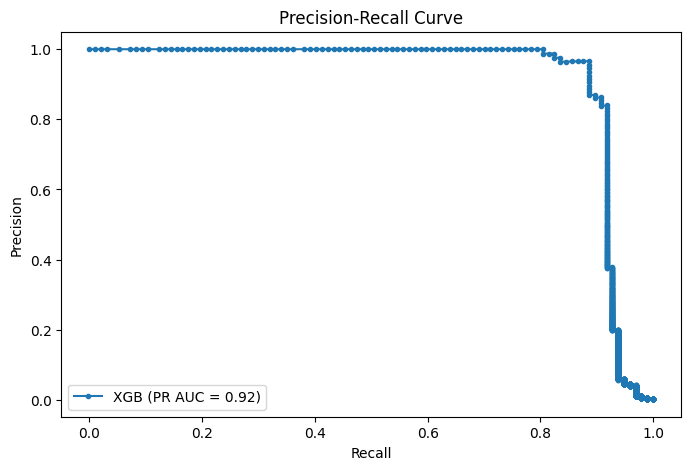

In [60]:
# Model Evaluation (Updated)
# Make Predictions
from sklearn.metrics import auc, precision_recall_curve

y_pred_proba = final_xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute Precision-Recall AUC
pr_auc = auc(recall, precision)
print("\nPrecision-Recall AUC Score:", pr_auc)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label="XGB (PR AUC = {:.2f})".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
